In [97]:
import stockfinder.core as core
import sqlite3
import time
import logging

import importlib
importlib.reload(core)
importlib.reload(logging)

USE_INIT = False

sysdate = time.strftime('%Y%m%d')
print('SYSDATE: [{}]'.format(sysdate))

if USE_INIT:
    core.init_database(True)
    core.fill_calendar('2018')
    core.fill_krx_base(core.MARKET_KOSPI)
    # core.fill_krx_base(core.MARKET_KOSDAQ)

with core.DBConn() as conn:
    cur = conn.cursor()
    cur.execute('''select *
                     from calendar
                    where work = 'Y'
                      and date < ?
                   order by date desc
                   ''', (sysdate, ))
    dates = []
    for d in cur:    
        dates.append(d[0])
    cur.close()

for date in dates:
    try:
        core.fill_krx_rank(date)
    except:
        break

core.fill_indices()

print('Complete')
conn.close()

SYSDATE: [20180924]


D:\Workspace\stockfinder\stockfinder\core.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[k][i] = df['close'][i]


GENERATE INDICES. SYMBOL: 005930, ELAPSED: 0.139
Complete


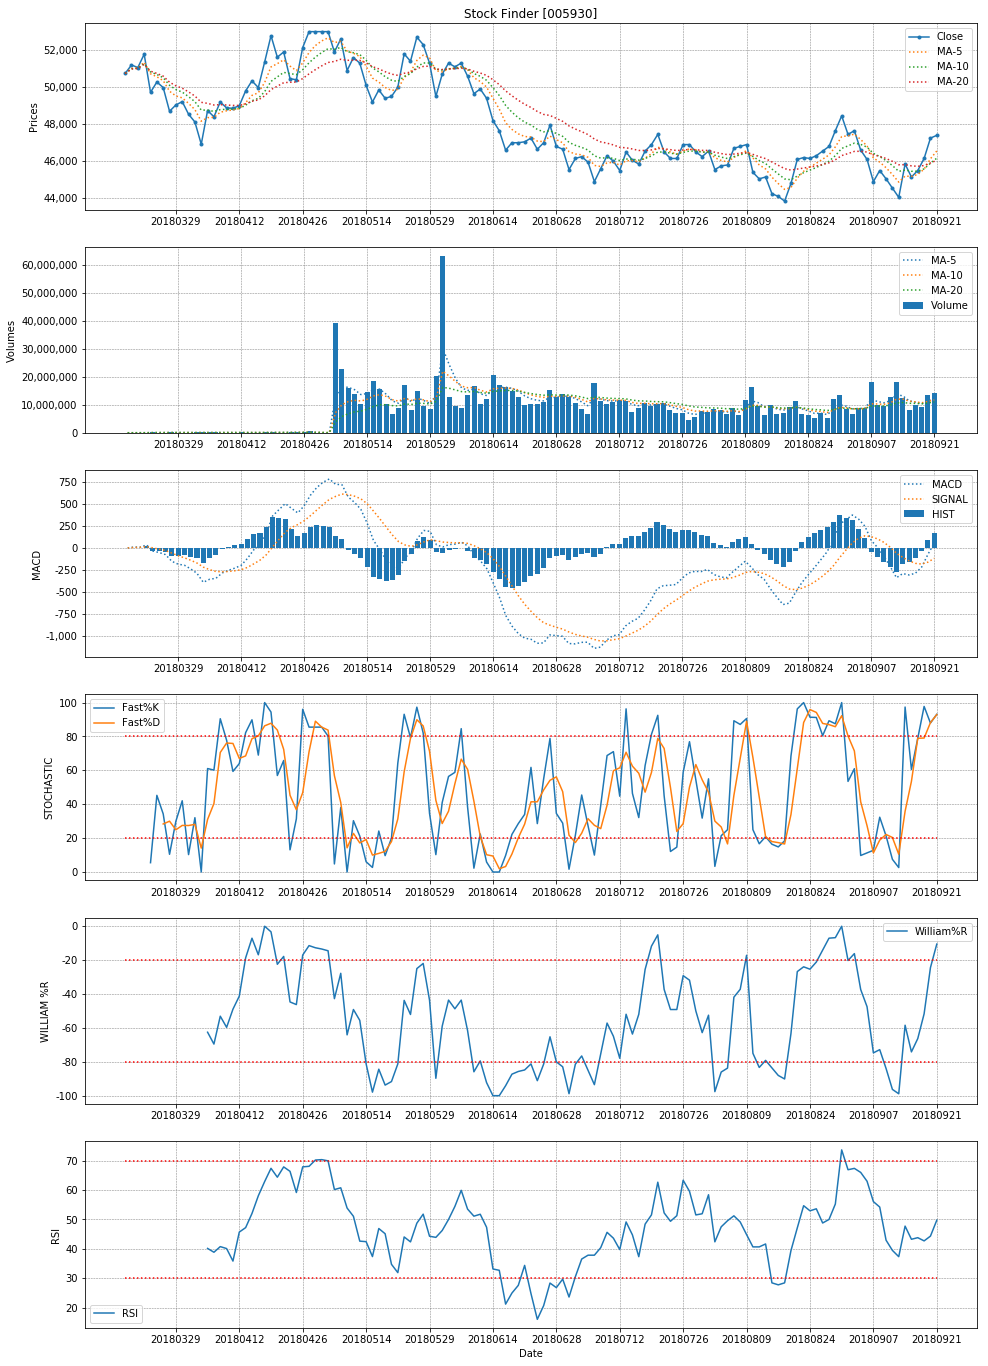

In [99]:
import stockfinder.core as core
import stockfinder.chart as chart
import matplotlib.pyplot as plt
import sqlite3
import time

import importlib
importlib.reload(core)
importlib.reload(chart)

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 24)
chart.draw_basic_chart('005930')
plt.show()